In [1]:
# Install libraries (if needed)
!pip install pandas scikit-learn matplotlib seaborn xgboost

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file manually
uploaded = files.upload()

# Load the dataset (get the filename from uploaded files)
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes_prediction_dataset.csv']))

# Show the first few rows
data.head()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [2]:
# Check the structure of the dataset
data.info()

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Check basic statistics
print("\nBasic statistics:")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB

Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

B

In [3]:
# Step 3: Data Preprocessing

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['gender', 'smoking_history'], drop_first=True)

# View the first few rows after encoding
data_encoded.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


In [4]:
# Step 4: Split data and build the first model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96035

Confusion Matrix:
 [[18121   179]
 [  614  1086]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000



In [5]:
# Step 5: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9703

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18121   179]
 [  614  1086]]


In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 6: XGBoost Classifier
# Initialize and train XGBoost without deprecated parameters
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, xgb_pred))


XGBoost Accuracy: 0.971

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.94      0.70      0.80      1700

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[18230    70]
 [  510  1190]]


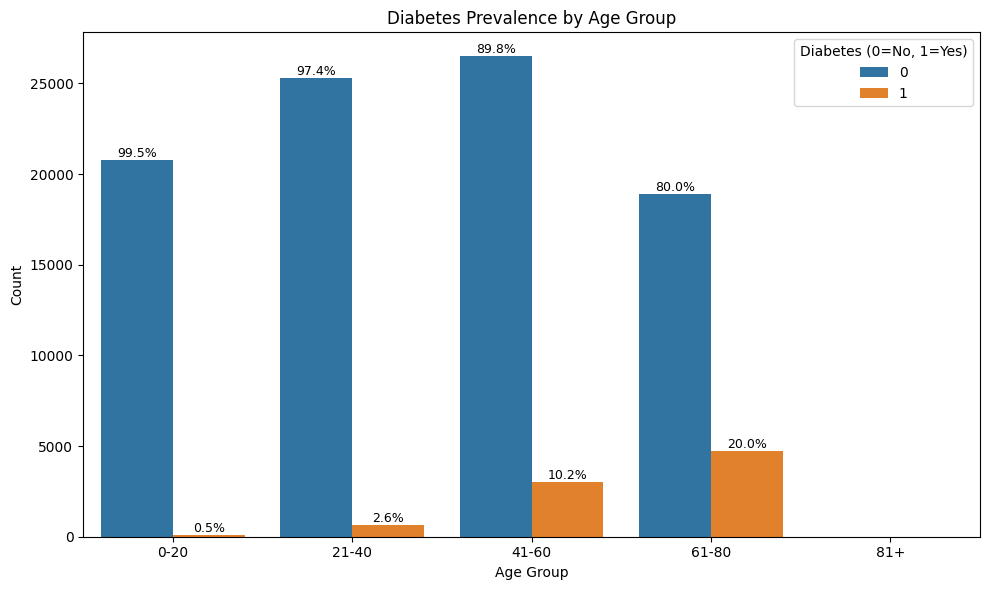

In [14]:
# Q1: How does diabetes prevalence vary across age groups and genders?

# Create age bins
data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 80, 100],
                           labels=['0-20', '21-40', '41-60', '61-80', '81+'])

# Count total per age group (add observed=False to suppress warning)
total_per_group = data.groupby('age_group', observed=False).size()

# Countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='age_group', hue='diabetes')

# Add percentage labels on bars
for p in ax.patches:
    age_group = p.get_x() + p.get_width()/2
    group_label = ax.get_xticks().index(min(ax.get_xticks(), key=lambda x:abs(x-age_group)))
    group = ax.get_xticklabels()[group_label].get_text()

    total = total_per_group.loc[group]
    count = int(p.get_height())
    percent = 100 * count / total

    if count > 0:
        ax.text(p.get_x() + p.get_width()/2, p.get_height() + 1,
                f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)

# Styling
plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes (0=No, 1=Yes)', loc='upper right')
plt.tight_layout()
plt.show()


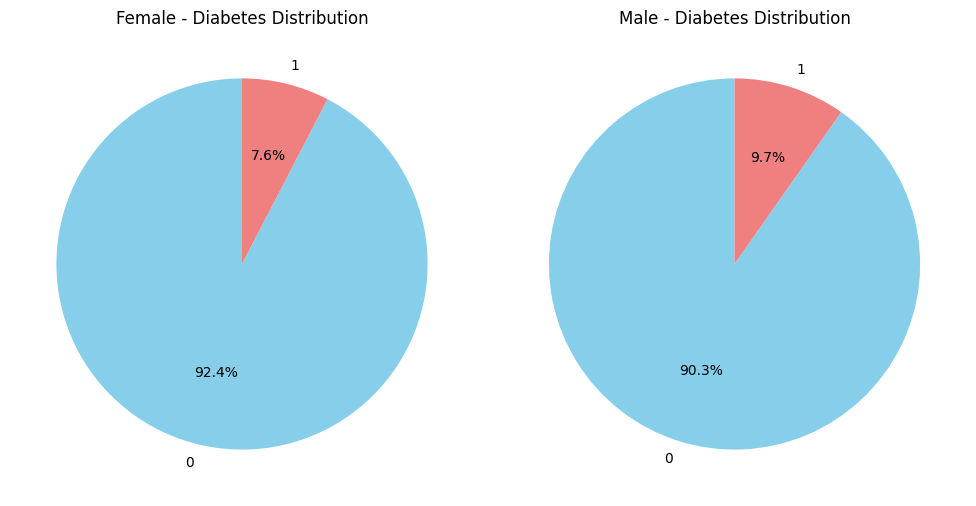

In [8]:
# Step 1: Calculate gender-wise diabetes percentages
# Remove rows where gender is 'Other'
data = data[data['gender'].isin(['Male', 'Female'])]

gender_counts = data.groupby('gender')['diabetes'].value_counts(normalize=True).unstack() * 100
gender_counts = gender_counts.fillna(0)  # Handle missing data

# Step 2: Create dynamic subplots
num_genders = gender_counts.shape[0]
fig, axes = plt.subplots(1, num_genders, figsize=(5 * num_genders, 5))

# Ensure axes is iterable
if num_genders == 1:
    axes = [axes]

# Step 3: Plot pie charts
for i, gender in enumerate(gender_counts.index):
    axes[i].pie(gender_counts.loc[gender], labels=gender_counts.columns,
                autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
    axes[i].set_title(f'{gender} - Diabetes Distribution')

plt.tight_layout()
plt.show()



Average Health Metrics by Diabetes Status:
                bmi  blood_glucose_level  HbA1c_level
diabetes                                             
0         26.887067           132.851173     5.396759
1         31.988382           194.094706     6.934953


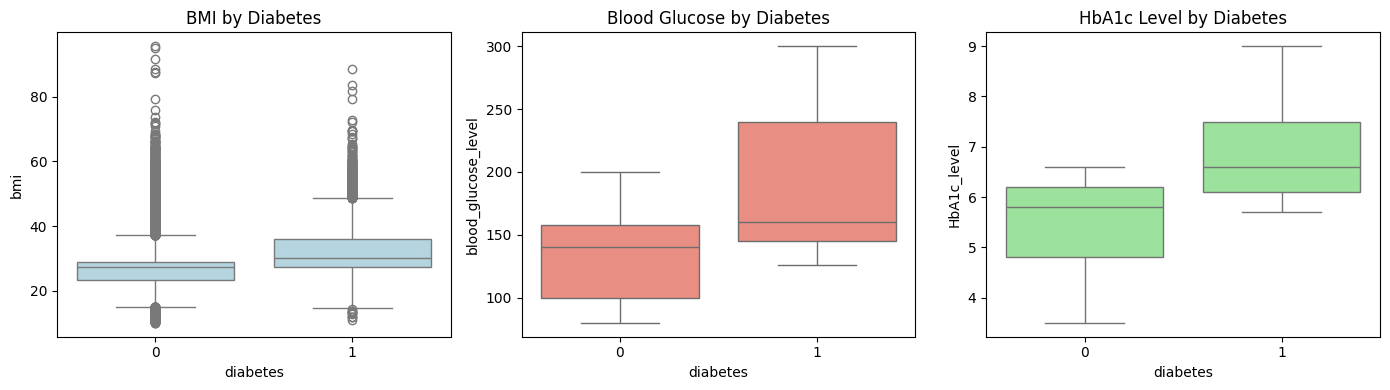

In [15]:
# Q2: What is the average BMI, glucose, and HbA1c level in diabetic vs non-diabetic people?

# Avg metrics by diabetes status
avg_metrics = data.groupby('diabetes')[['bmi', 'blood_glucose_level', 'HbA1c_level']].mean()
print("\nAverage Health Metrics by Diabetes Status:")
print(avg_metrics)

# Boxplots for visual comparison
plt.figure(figsize=(14, 4))

# Boxplot for BMI by Diabetes
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='diabetes', y='bmi', hue='diabetes', palette=['lightblue', 'lightblue'], legend=False)
plt.title('BMI by Diabetes')

# Boxplot for Blood Glucose by Diabetes
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='diabetes', y='blood_glucose_level', hue='diabetes', palette=['salmon', 'salmon'], legend=False)
plt.title('Blood Glucose by Diabetes')

# Boxplot for HbA1c Level by Diabetes
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='diabetes', y='HbA1c_level', hue='diabetes', palette=['lightgreen', 'lightgreen'], legend=False)
plt.title('HbA1c Level by Diabetes')

plt.tight_layout()
plt.show()


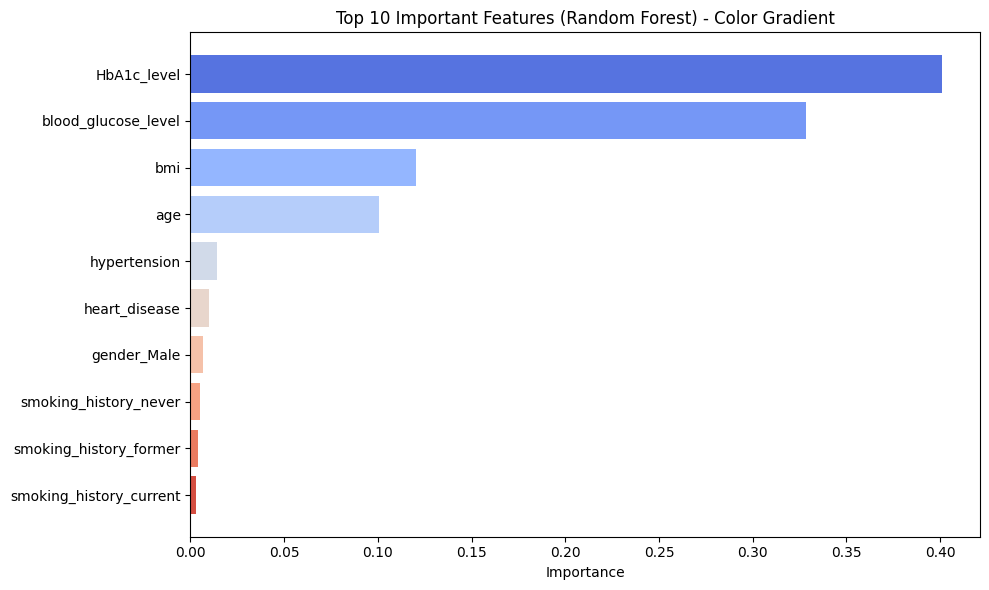

In [16]:
# Q3: Which features are most important for predicting diabetes?

# Feature Importance using Random Forest
importances = rf.feature_importances_
features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Use matplotlib with seaborn color palette
plt.figure(figsize=(10, 6))
top_features = rf_importance_df.head(10)
colors = sns.color_palette("coolwarm", len(top_features))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color=colors[::-1])
plt.title("Top 10 Important Features (Random Forest) - Color Gradient")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [11]:
# Save the DataFrame to a CSV file
data.to_csv('diabetes_prediction_dataset.csv', index=False)

# Allow the file to be downloaded from Colab
from google.colab import files
#files.download('diabetes_prediction_dataset.csv')

In [12]:
rf_importance_df.to_csv("feature_importance.csv", index=False)
